In [ ]:
import pandas as pd
import numpy as np

# Data Pre-processing

In [ ]:
#reading data
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Fraud.csv")
#shape data
df.shape

(1048575, 11)

In [ ]:
#head of data
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19200000.00,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [ ]:
#tail of data
df.tail(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048475,95,CASH_OUT,39111.66,C725039256,17247.00,0.00,C324304787,195796.68,234908.34,0,0
1048476,95,PAYMENT,1202.64,C951969945,175272.35,174069.71,M1168944565,0.00,0.00,0,0
1048477,95,PAYMENT,7261.94,C2034380846,174069.71,166807.77,M1805853798,0.00,0.00,0,0
1048478,95,CASH_IN,347999.74,C1007542443,21246.00,369245.74,C1798573266,364028.35,16028.61,0,0
1048479,95,CASH_OUT,153102.88,C476853146,41077.00,0.00,C294003559,0.00,153102.88,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


# Checking for Null Values

In [ ]:
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

There is no null or missing values#information of data

In [ ]:
#information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [ ]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legitpercentage=  (legit / (fraud + legit)) * 100
fraudpercentage=  (fraud / (fraud + legit)) * 100

print("no.of legit transactions : ",legit)
print("no. of fraud transactions : ",fraud)
print("% of legit transactions :" ,legitpercentage)
print("% of fraud transactions : ",fraudpercentage)

no.of legit transactions :  1047433
no. of fraud transactions :  1142
% of legit transactions : 99.89109028920201
% of fraud transactions :  0.10890971079798775


Imbalance in data as % of legit transactions = 99.89109028920201 and % of fraud transactions = 0.10890971079798775. Random forests and Decision trees can be used for imbalanced data.

For nameDest M----- there is no information about old balance and new balance

In [ ]:
#Information about Merchants
M= df[df['nameDest'].str.contains('M')]
M.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


# Data Visualization using Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Number of Legit and Fraud transactions

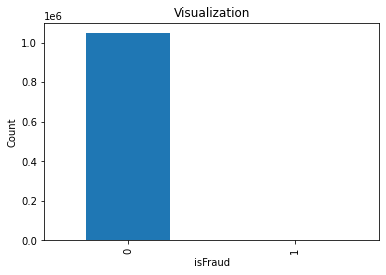

In [ ]:
labels=["Legit","Fraud"]
count_class=df.value_counts(df['isFraud'],sort=True)
count_class.plot(kind="bar")
plt.title("Visualization")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap

<AxesSubplot:>

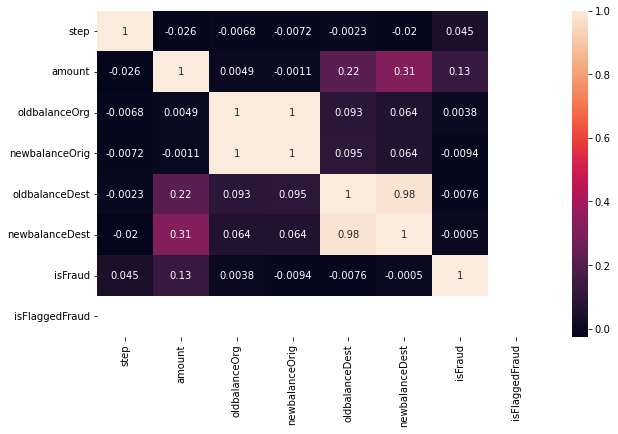

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# Model for Fraud Detection

Copy of dataset for training and testing models

In [ ]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#Finding attributes having obejct data type
objlst=new_df.select_dtypes("object").columns
print(objlst)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


# Label Encoding

In [ ]:
#Label Encoding to convert object dat type to numeric data type

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objlst:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int32  
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  int32  
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  int32  
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 76.0 MB
None


# Multicolinearity

In [ ]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,3.306890
1,type,2.560127
2,amount,1.983391
3,nameOrig,3.260611
4,oldbalanceOrg,707.746854
5,newbalanceOrig,714.926802
6,nameDest,3.645669
7,oldbalanceDest,38.328865
8,newbalanceDest,41.112281
9,isFraud,1.132943


In [ ]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,2.174905
1,amount,1.856347
2,isFraud,1.125410
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.298018
5,Actual_amount_dest,1.554612
6,TransactionPath,2.417530


# New Correlation Map

<AxesSubplot:>

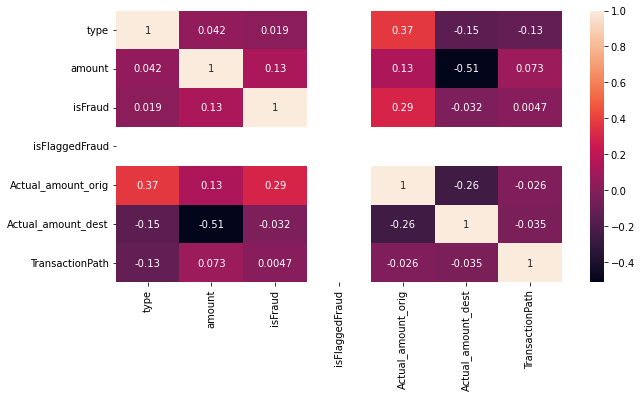

In [ ]:
corr=new_df.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

# Fraud Detection Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:

X = new_df.drop(["isFraud"], axis= 1)
Y = new_df["isFraud"]

# Train-Test-Split

In [ ]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (734002, 6)
Shape of X_test:  (314573, 6)


# Training the Model

# Decision Tree

In [ ]:
#using decision tree

X = new_df.drop(["isFraud"], axis= 1)
Y = new_df["isFraud"]
Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [ ]:
#score of decision tree

print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.9138514748564


# Random Forest

In [ ]:
#using Random forest

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [ ]:
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.95295209696954


# Confusion Matrix for Decision Tree

In [ ]:
# confusion matrix for Decision Tree 

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 230
False Positives: 152
True Negatives: 314072
False Negatives: 119


# Confusion Matrix for Random forest

In [ ]:
#confusion matrix for Random forest

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Random Forest
True Positives: 230
False Positives: 29
True Negatives: 314195
False Negatives: 119


In [ ]:
# confusion matrix for Decision Tree
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

Confusion Matrix - Decision Tree
[[314072    152]
 [   119    230]]


In [ ]:
# confusion matrix for random forest

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[314195     29]
 [   119    230]]


# Classification report for Random forest

In [ ]:
#Classification report for Random forest

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.60      0.66      0.63       349

    accuracy                           1.00    314573
   macro avg       0.80      0.83      0.81    314573
weighted avg       1.00      1.00      1.00    314573



# Classification report for Decision Tree

In [ ]:
# Classification report for Random forest

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.89      0.66      0.76       349

    accuracy                           1.00    314573
   macro avg       0.94      0.83      0.88    314573
weighted avg       1.00      1.00      1.00    314573



# Performance Mesaurement Tools

# Data visualization using Confusion Matrix

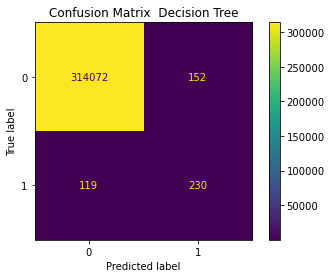

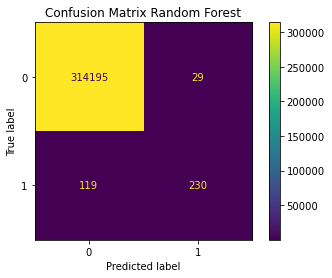

In [ ]:
# visualization using Confusion Matrix


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix  Decision Tree')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix Random Forest')
plt.show()

# AUC ROC for Decision Tree

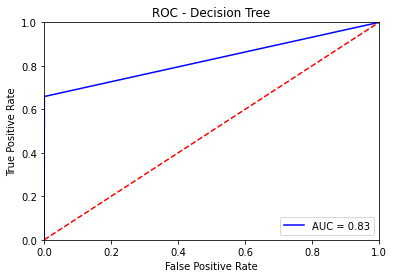

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC for Decision Tree

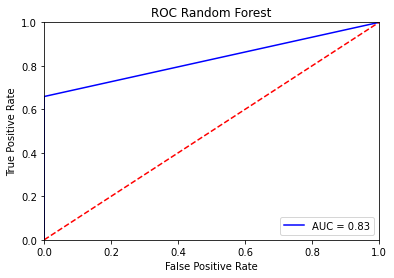

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC for both Random Forest and Decision Tree are same

# 1.Data cleaning including missing values, outliers and multi-collinearity.

Pre-processing of data using df.shape and there were no null values

# Describe your fraud detection model in elaboration.

Both Random forest and Decision trees have same AUC and Confusion matrix. Fraud detection model detects number of fraud transactions using Decision tree and Random forest as the data set is highly imbalanced.

# 3. How did you select variables to be included in the model?

I have selected the variables using  VIF values and correlation heatmap. 

# What are the key factors that predict fraudulent customer?

Factors for predicting fraud customers are : 
    1.org name should be legit
    2.old balance and new balance transaction must be legit
    3.request from source must be legit

# What kind of prevention should be adopted while company update its infrastructure?

1.User access controls
2.using machine learning algorithms like Decision tree and Random Forest
3.Browsing through safe websites
4.Using VPN

# Assuming these actions have been implemented, how would you determine if they work?

1.Maintaing a log of transactions
2.Sending statement receipts to customers